The above data is About the suicide rates in India. The data is stratified based on the eductation status, means adopted and professional profile. The data recorded is observed from  the time duration 2001-2012.

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
sns.set()


In [2]:
#reading the data 
data=pd.read_csv('Suicides in India 2001-2012.csv')
data.head()


,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001.0,Causes,Illness (Aids/STD),Female,0-14,0.0
1,A & N Islands,2001.0,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0.0
2,A & N Islands,2001.0,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0.0
3,A & N Islands,2001.0,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0.0
4,A & N Islands,2001.0,Causes,Dowry Dispute,Female,0-14,0.0


In [3]:
data.duplicated().any()

False

In [0]:
data.replace('A & N Islands (Ut)', 'A & N Islands', inplace=True)
data.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
data.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace=True)
data.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
data.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
data.replace('Delhi (Ut)', 'Delhi', inplace=True)
data.replace('Bankruptcy or Sudden change in Economic','Bankruptcy or Sudden change in Economic Status', inplace=True)
data.replace('By Other means (please specify)', 'By Other means', inplace=True)
data.replace('Not having Children(Barrenness/Impotency','Not having Children (Barrenness/Impotency)', inplace=True)



In [5]:
data.sample(5)

,State,Year,Type_code,Type,Gender,Age_group,Total
38822,Chandigarh,2010.0,Causes,Failure in Examination,Female,0-14,1.0
46692,Chhattisgarh,2011.0,Professional_Profile,Others (Please Specify),Male,45-59,530.0
65300,Delhi,2009.0,Causes,Causes Not known,Female,15-29,98.0
79904,Gujarat,2011.0,Causes,Insanity/Mental Illness,Female,0-14,3.0
60751,Delhi,2001.0,Causes,Bankruptcy or Sudden change in Economic Status,Male,0-14,3.0


Now Let us examine the number of cases reported gender wise

Male      40332
Female    40233
Name: Gender, dtype: int64


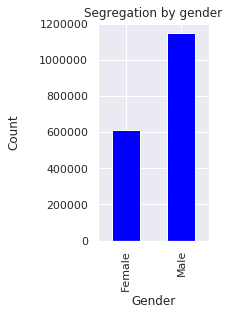

In [30]:
print(data.Gender.value_counts())
gen=data.groupby('Gender').sum()['Total'].plot("bar",figsize=(2,4),title='Segregation by gender',color='blue')
gen.set_xlabel('Gender')
gen.set_ylabel('Count\n')
sns.set_palette('Set2');


From the above graph it can be infered that there are more case of males comitting suicide compared to females during the time period 2001-2012

Let us further explore the data on the leading causes of suicide based on gender

Text(0.5, 0, '\ncount')

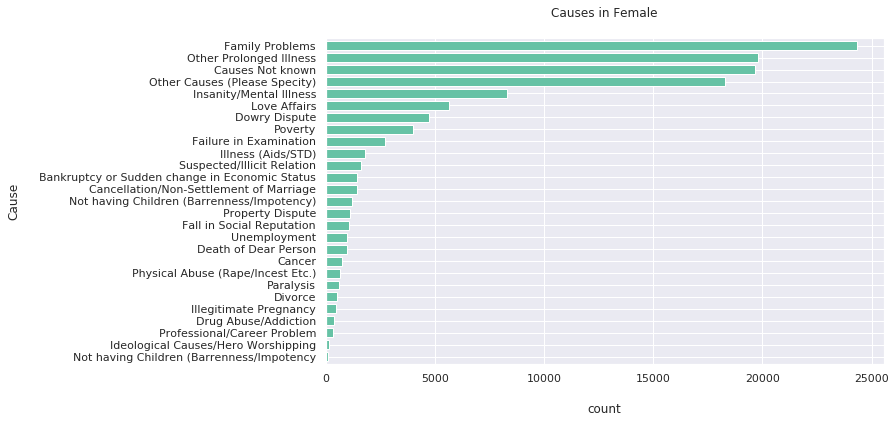

In [7]:
fem_gender=data[data['Gender']=='Female']
fem_causes=fem_gender[fem_gender['Type_code']=='Causes']
plt_type = fem_causes.groupby('Type').sum()['Total']
sort_df = plt_type.sort_values(ascending = True)
figure = sort_df.plot('barh', figsize = (10,6), title = 'Causes in Female' + '\n', width = 0.75)
figure.set_ylabel('Cause\n')
figure.set_xlabel('\n' + 'count' )


Let us now explore the causes in men

Text(0, 0.5, 'Cause\n')

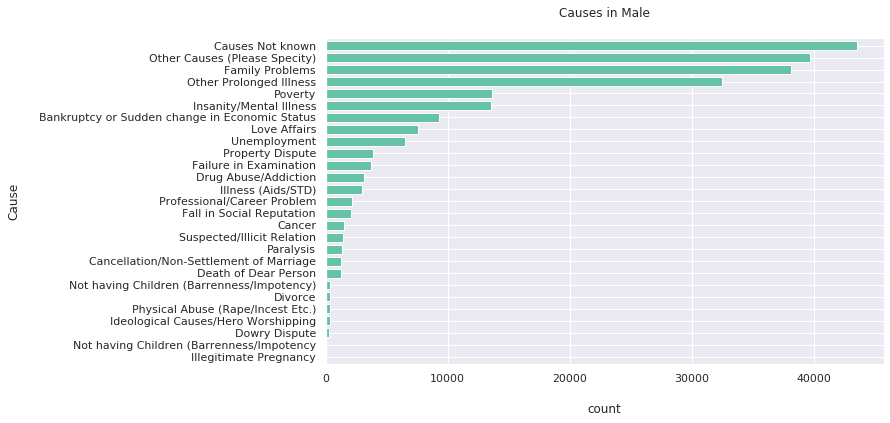

In [8]:
male_gender=data[data['Gender']=='Male']
male_causes=male_gender[male_gender['Type_code']=='Causes']
plt_type = male_causes.groupby('Type').sum()['Total']
sort_df = plt_type.sort_values(ascending = True)
figure = sort_df.plot('barh', figsize = (10,6), title = 'Causes in Male' + '\n', width = 0.75)
figure.set_xlabel('\n' + 'count' )
figure.set_ylabel('Cause\n')
 

from the above two graphs it can be infered that Family related problems is the leading cause of suicide in both the genders.

Next I would like to explore the number of suicides based on age groups

15-29     15433
0-14      15371
30-44     15369
45-59     15344
60+       15330
0-100+     3718
Name: Age_group, dtype: int64


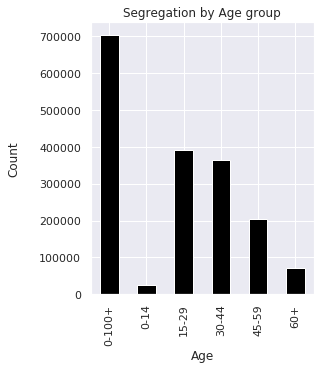

In [9]:
print(data.Age_group.value_counts())
gen=data.groupby('Age_group').sum()['Total'].plot("bar",figsize=(4,5),title='Segregation by Age group',color='black')
gen.set_xlabel('Age')
gen.set_ylabel('Count\n')
sns.set_palette('Set2');

From the above graph we can infer that induviduals in the age group 15-29 and 30-44 are more prone to suicide. Sadly there's a small population of elderly and children between 0 to 14 comitting suicide.

Text(0.5, 0, '\ncount')

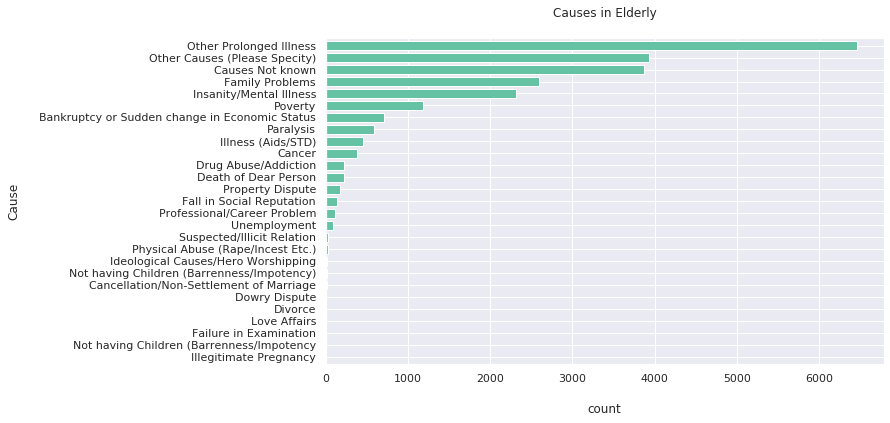

In [10]:
elderly = data[data['Age_group']== '60+']
causes=elderly[elderly['Type_code']=='Causes']
plt_type=causes.groupby('Type').sum()['Total']
sort_df = plt_type.sort_values(ascending = True)
figure = sort_df.plot('barh', figsize = (10,6), title = 'Causes in Elderly' + '\n', width = 0.75)
figure.set_ylabel('Cause\n')
figure.set_xlabel('\n' + 'count' )


Text(0.5, 0, '\ncount')

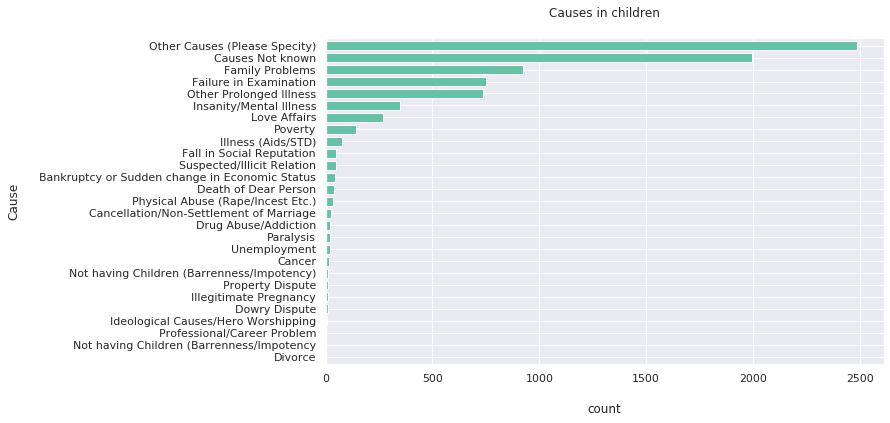

In [38]:
children = data[data['Age_group']== '0-14']
causes=children[children['Type_code']=='Causes']
plt_type=causes.groupby('Type').sum()['Total']
sort_df = plt_type.sort_values(ascending = True)
figure = sort_df.plot('barh', figsize = (10,6), title = 'Causes in children' + '\n', width = 0.75)
figure.set_ylabel('Cause\n')
figure.set_xlabel('\n' + 'count' )

From the above chart it can be infered that prolonged illness, are the main cause of suicides in the elderly and in children though lot of cases were recorded for unknown causes, It can bee seen that family problem and failure in examination is leading causes.


Since India is a family centered soceity, I would like to explore how Impotency,Family related issues,Divorce,Non settlement of marriage affect genderwise

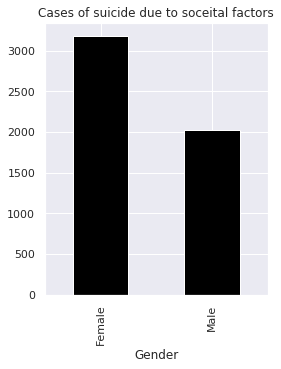

In [37]:
#suicide related to family problems grouped by gender
causes = data[data['Type'].isin(['Not having Children (Barrenness/Impotency)', 'Family Problem','Divorce','Cancellation/Non-Settlement of Marriage'])]
affect=causes.groupby('Gender').sum()['Total'].plot("bar",figsize=(4,5),title='Cases of suicide due to soceital factors',color='black')

I would like to know the trends in suicide related to family related issues in females

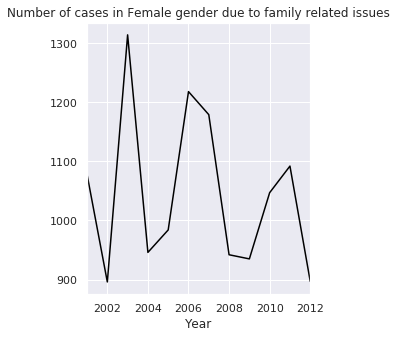

In [42]:
causes = data[data['Type'].isin(['Not having Children (Barrenness/Impotency)', 'Family Problem','Divorce','Cancellation/Non-Settlement of Marriage'])]
causes1=children[children['Gender']=='Female']
affect=causes1.groupby('Year').sum()['Total'].plot("line",figsize=(4,5),title='Number of cases in Female gender due to family related issues',color='black')

It is positive to see that the number of cases have been declining 2010-2012

I would like to explore the suicide related to Financial issues grouped by gender.

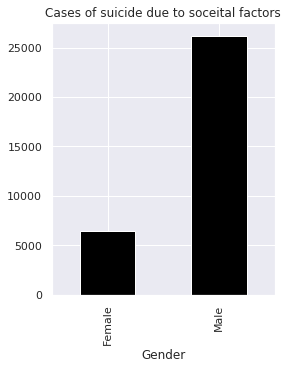

In [39]:
#financial related problem grouped by gender
causes = data[data['Type'].isin(['Property Dispute', 'Fall In Social Reputation','Professional/Career Problem','Unemployment','Poverty'])]
affect=causes.groupby('Gender').sum()['Total'].plot("bar",figsize=(4,5),title='Cases of suicide due to soceital factors',color='black')

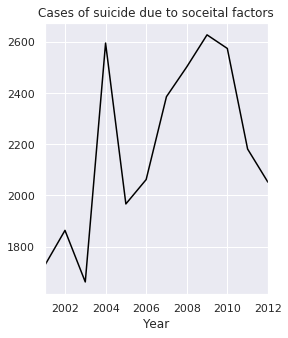

In [45]:
causes = data[data['Type'].isin(['Property Dispute', 'Fall In Social Reputation','Professional/Career Problem','Unemployment','Poverty'])]
causes1=causes[causes['Gender']=='Male']
affect=causes1.groupby('Year').sum()['Total'].plot("line",figsize=(4,5),title='Cases of suicide due to soceital factors',color='black')


It is positive to see that there has been a decline in the number of cases due to financial issues in males from 2010 to 2012

As expected in a patriarchy based soceity with strict gender roles. Where women are expected to nurture and men are expected provide for the family. 

*   Females are victims of family related issues
*   Men are victims of Financial related issues



people with prolonged illness and STD are often faced with discriminatory attitudes from the soceity and I would like to know the reported number of cases due to related to illness every year.

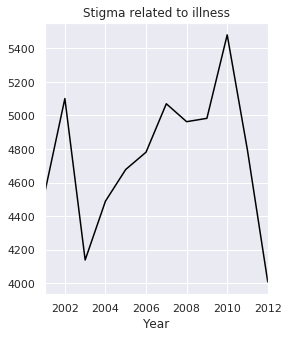

In [36]:
causes = data[data['Type'].isin(['Illness (Aids/STD)','Other Prolonged Illness'])]
affect=causes.groupby('Year').sum()['Total'].plot("line",figsize=(4,5),title='Stigma related to illness',color='black')


From the above graph it can be infered that the suicide cases due to illness has been reduced and has been on steady decline.
Also I would like to seperately explore the cases of suicide due to mental illness between the year 2000 to 2012. 
Mental illness is something that has always taken a backseat in the world. I would like to explore the number of cases reported during this time period.

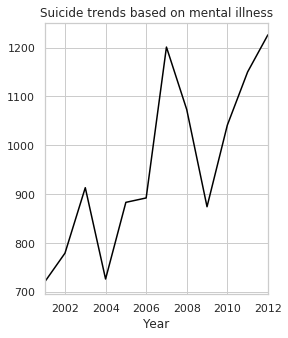

In [0]:
affect=causes.groupby('Year').sum()['Total'].plot("line",figsize=(4,5),title='Suicide trends based on mental illness',color='black')

It is saddening to see that the number of suicides related to mental health has been rising over the years. 

Agricltural based activities are the backbone of Indian Economy during post independance era. Farmers have always been held in high regard but there has been reported cases of farmers comitting suicide and I would like to explore the number of cases that has been reported.

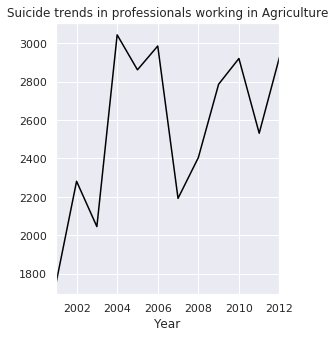

In [0]:
causes=data[data['Type']=='Farming/Agriculture Activity']
affect=causes.groupby('Year').sum()['Total'].plot("line",figsize=(4,5),title='Suicide trends in professionals working in Agriculture',color='black')

It is saddening to see the number of cases reported by induviduals employed in the Agriculture have been increasing 

**CONCLUSIONS**


1.   Family Related problem are cause of death in both the genders
2.   Prolonged illness and education related issues have been the leading cause of suicide in elderly and in Kids respectively
3.   Men are victims of financial related issues 
4.   Women are victims of family related issues
5.  Despite the alarming causes there has been steady decline of cases reported for the above two points
6.   There has been a decline in the amount of disease due to illness 
7.   There has been a sharp incline in the cases of suicide due mental illness
8.  There has been increasing in the number of suicides reported in induviduals working in agricultural fields.







